In [2]:
pip install --upgrade keras tensorflow

                                              0.0/1.0 MB ? eta -:--:--
     ---------------------                    0.5/1.0 MB 11.1 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 12.6 MB/s eta 0:00:00
                                              0.0/240.6 kB ? eta -:--:--
     ------------------------------------- 240.6/240.6 kB 15.4 MB/s eta 0:00:00
                                              0.0/101.3 kB ? eta -:--:--
     ---------------------------------------- 101.3/101.3 kB ? eta 0:00:00
                                              0.0/87.5 kB ? eta -:--:--
     ---------------------------------------- 87.5/87.5 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [7]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [8]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [9]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [11]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [12]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [13]:
from tqdm.notebook import tqdm

In [14]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [15]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\VIDHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [16]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [17]:
x_train = train_features/255.0
x_test = test_features/255.0

In [20]:
pip install scikit-learn


                                              0.0/9.2 MB ? eta -:--:--
     -----                                    1.3/9.2 MB 26.8 MB/s eta 0:00:01
     ---------------                          3.6/9.2 MB 37.9 MB/s eta 0:00:01
     -------------------------                5.9/9.2 MB 41.6 MB/s eta 0:00:01
     -----------------------------------      8.1/9.2 MB 43.4 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 45.3 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 36.8 MB/s eta 0:00:00
                                              0.0/44.1 MB ? eta -:--:--
     -                                        1.8/44.1 MB 59.1 MB/s eta 0:00:01
     ----                                     4.6/44.1 MB 48.8 MB/s eta 0:00:01
     -----                                    6.0/44.1 MB 42.2 MB/s eta 0:00:01
     -------                                  8.3/44.1 MB 44.2 MB/s eta 0:00:01
     ---------                               10.7/44.1 MB 46.7


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [23]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [24]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [25]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [26]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [27]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100


226/226 [==============================] - 167s 727ms/step - loss: 1.8228 - accuracy: 0.2445 - val_loss: 1.8133 - val_accuracy: 0.2594
Epoch 2/100
226/226 [==============================] - 170s 751ms/step - loss: 1.7996 - accuracy: 0.2521 - val_loss: 1.7740 - val_accuracy: 0.2597
Epoch 3/100
226/226 [==============================] - 181s 799ms/step - loss: 1.7299 - accuracy: 0.2893 - val_loss: 1.6414 - val_accuracy: 0.3497
Epoch 4/100
226/226 [==============================] - 196s 868ms/step - loss: 1.6037 - accuracy: 0.3690 - val_loss: 1.4902 - val_accuracy: 0.4188
Epoch 5/100
226/226 [==============================] - 194s 857ms/step - loss: 1.5075 - accuracy: 0.4117 - val_loss: 1.3730 - val_accuracy: 0.4670
Epoch 6/100
226/226 [==============================] - 199s 882ms/step - loss: 1.4530 - accuracy: 0.4339 - val_loss: 1.3305 - val_accuracy: 0.4901
Epoch 7/100
226/226 [==============================] - 198s 877ms/step - loss: 1.4029 - accuracy: 0.4607 - val_loss:

KeyboardInterrupt: 

In [28]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\VIDHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
from keras.models import model_from_json

In [31]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [32]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [33]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [34]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\VIDHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 352ms/step
model prediction is  sad


original image is of sad
1/1 [==============================] - 0s 66ms/step
model prediction is  sad


C:\Users\VIDHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


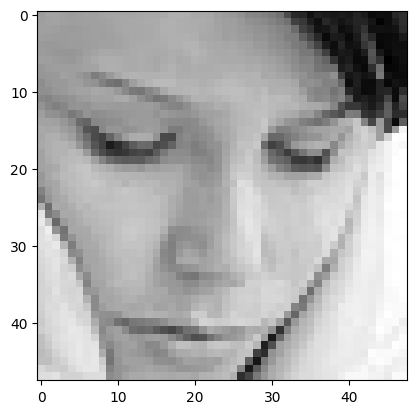

In [39]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [37]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
                                              0.0/7.6 MB ? eta -:--:--
     ----                                     0.9/7.6 MB 18.9 MB/s eta 0:00:01
     -----------                              2.3/7.6 MB 24.3 MB/s eta 0:00:01
     --------------------                     3.9/7.6 MB 27.9 MB/s eta 0:00:01
     -----------------------------            5.6/7.6 MB 30.1 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 35.0 MB/s eta 0:00:01
     ---------------------------------------- 7.6/7.6 MB 30.5 MB/s eta 0:00:00
                                              0.0/187.6 kB ? eta -:--:--
     ---------------------------------------- 187.6/187.6 kB ? eta 0:00:00
                                              0.0/2.2 MB ? eta -:--:--
     ---------------------------------------  2.2/2.2 MB 46.0 MB/s eta 0:00:01
     ---------------------------------------- 2.2/2.2 MB 46.2 MB/s eta


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import matplotlib.pyplot as plt

original image is of fear
1/1 [==============================] - 0s 67ms/step
model prediction is  sad


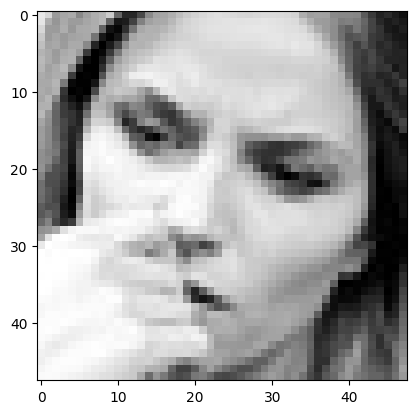

In [40]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 67ms/step
model prediction is  surprise


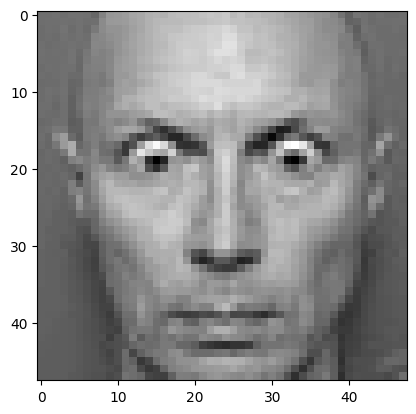

In [41]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')